# Coleta de Dados no MySQL utilizando o R

### Instalação do pacote

Antes de usar o pacote a primeira vez, você deve instalar. Para isso, execute o comando abaixo.

In [ ]:
install.packages('RMariaDB')

#### Para mais detalhes sobre a biblioteca RMariaDB consulte:
* https://cran.r-project.org/web/packages/RMariaDB/RMariaDB.pdf

O pacote dbi também pode ser usado para tabralhar com banco de dados relacionais.
Documentação:
 * https://db.rstudio.com/dbi/

**SEMPRE** deve ser realizada a importação do pacote antes de usá-lo. 

In [ ]:
#importação do pacote
library(RMariaDB)
# require(RMariaDB)

#Importa pacote RMariaDB se ele ainda não foi carregado
if(!"RMariaDB" %in% (.packages())){require(RMariaDB)}

**Observação 1:** A mensagem abaixo indica um alerta que o pacote foi construído em uma versão específica do R.

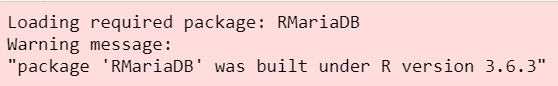

**Observação 2:** A mensagem abaixo indica que o pacote não foi instalado. 
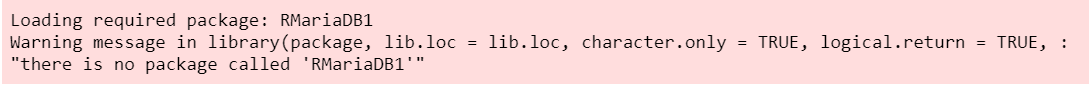

**Observação 3:** Caso ocorra o erro semelhante ao abaixo, significa que você não importou o pacote no qual a função existe. Por exemplo, a função "*dbConnect*" existe no pacote *RMariaDB*

* Error in dbConnect(MariaDB(), user = "root", password = "igti", dbname = "aula1", : could not find function "dbConnect"


In [ ]:
#Conecta ao SGBD MySQL --> Banco de dados bootcamp
con <- dbConnect(MariaDB(), user = "root", password = "igti",
                 dbname = "aula1", host = "localhost",serverTimezone='UTC')

**Observação 1:** A menagem abaixo indica que o banco de dados aula2 não existe.
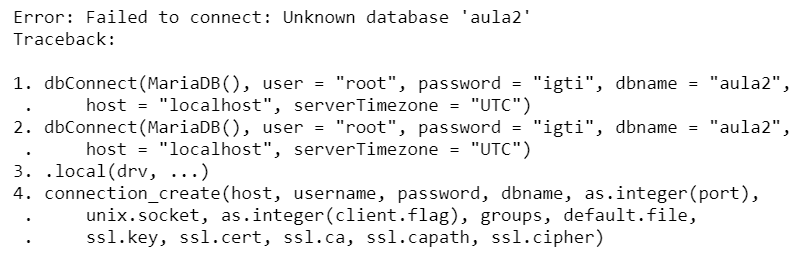

**Observação 2:** Caso ocorra o erro abaixo: 
*Error: Failed to connect: Plugin caching_sha2_password could not be loaded: The specified module could not be found.*

Acesse seu SGBD MySQL Server utilizando o MySQL Workbench e execute o comando abaixo no seu esquema de BD

    ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY 'igti';

Agora execute o comando de conexão novamente.

In [ ]:
#Para listar quais tabela existem no esquema .bootcamp. execute:

#Lê a lista de tabelas no BD
tables <- dbListTables(con) 
tables

In [ ]:
#Para consultar quais os dados de uma tabela execute:
# dbReadTable(nome-da-conexao,"nome-da-tabela")

#Consulta os dados da tabela *estado*
tabledata <- dbReadTable(con,"estado")
tabledata

In [ ]:
#Consulta os dados da tabela *tipounidade*
tabledata <- dbReadTable(con,"tipounidade")
tabledata

In [ ]:
#Para executar um comando SQL execute:
#dbSendQuery(nome-da-conexao,"comando")

# Vamos inserir uma nova linha na tabela tipounidade
# Cria o comando e salva na variável query
query <-  "INSERT INTO tipounidade(idTipoUnidade,dscTipoUnidade) VALUES('7','Loft');"

# Opcional.
#print(query)

results <- dbSendQuery(con,query)
results

# Limpa resultados
dbClearResult(results)

**OBS 1:** Caso ocorra o erro: *Error: Duplicate entry '6' for key 'tipounidade.PRIMARY' [1062]*

Isso significa que você violou a chave primária, ou seja, tentou inserir uma chave que já existe. Confira o valor da chave que esta inserindo, altere, e execute novamente.

**OBS 2:** Caso ocorra o erro: *Error: Column count doesn't match value count at row 1 [1136]*
Isso significa que você esta inserindo dados não compatíveis com a definição da tabela.


In [ ]:
#Consulta os dados da tabela *tipounidade*
tabledata <- dbReadTable(con,"tipounidade")
tabledata

In [ ]:
id <- 8
desc <- 'Chácara'

query <-  paste("INSERT INTO tipounidade(idTipoUnidade,dscTipoUnidade) VALUES(",id,",'",desc,"');",sep='')

# Opcional.
print(query)

results <- dbSendQuery(con,query)
results

# Limpa resultados
dbClearResult(results)

In [ ]:
#Consulta os dados da tabela *tipounidade*
tabledata <- dbReadTable(con,"tipounidade")
tabledata

In [ ]:
#install.packages('xlsx')

In [ ]:
#Importa pacote xlsx se ele ainda não foi carregado
if(!"xlsx" %in% (.packages())){require(xlsx)}

datasetpath <- 'C:/Bootcamp/Datasets/XLS'

filename <- paste(datasetpath,"/estados.xlsx",sep='')
filename

insertdata <- read.xlsx(filename, sheetIndex=1, header=TRUE,encoding="UTF-8")
insertdata


**OBS:** As colunas da tabela estado são: *CodEstadoIBGE,NomeEstado,SiglaEstado,Regiao*


In [ ]:
dbWriteTable(con,'estado',insertdata,append = TRUE)

In [ ]:
#Consulta os dados da tabela *estado*
tabledata <- dbReadTable(con,"estado")
tabledata

In [ ]:
#Importa pacote xlsx se ele ainda não foi carregado
# if(!"xlsx" %in% (.packages())){require(xlsx)}

query <- "SELECT * FROM estado;"

# Opcional.
#print(query)

results <- dbGetQuery(con,query)
results


In [ ]:
resultado <- dbReadTable(con,"caracteristicasgerais")
resultado

In [ ]:
#Antes de excutar esta célula, garanta que o caminho do arquivo estados.xlsx esteja correto.

filename <- "C:/Bootcamp/Datasets/CSV/caracteristicasgerais.csv"

insertdata <- read.csv(filename)


In [ ]:
dbWriteTable(con,'caracteristicasgerais',insertdata,append = TRUE)

In [ ]:
#Consulta os dados da tabela *caracteristicasgerais*

results <- dbReadTable(con,"caracteristicasgerais")
results

## Agora vamos usar o python 

##### Mas antes precisamos nos desconectar do SGBD

Fim demonstração R